# Automatic recognition of a positive or negative review

Using [Yelp Open Dataset](https://www.yelp.com/dataset) this task will classify the reviews into positive and negative. Go ahead to learn more about it.

### Used libraries
[Pandas](https://pandas.pydata.org/): most common, open source data analysis and manipulation tool.

[NumPy](https://numpy.org/): used for mathematical support for some processes.

[Matplotlib](https://matplotlib.org/): library used to create plots and interactive visualizations for our data.

[text_processing](): our functions used for text manipulation.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import text_processing

## Get reviews dataset
The reviews dataset was the first one that we used. It consists of the following features:
- review_id [string, 22 character unique review id]
- user_id [string, 22 character unique user id, maps to the user in user.json]
- business_id [string, 22 character business id, maps to business in business.json]
- stars [integer, star rating]
- date [string, date formatted YYYY-MM-DD]
- text [string, the review itself]
- useful [integer, number of useful votes received by review]
- funny [integer, number of funny votes received by review]
- cool [integer, number of cool votes received by review]

In order to increment performances on our computers we dropped some rows

In [10]:
df_review = pd.read_csv('../dataset/df_review_final.csv')

In [12]:
df_review = df_review.iloc[499000:, :]
df_review = df_review.reset_index()

df_review.head(5)

,level_0,Unnamed: 0,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,499000,499000,6989282,NIukhO8BR2wACBztNSRDbQ,Ta9o6-WIRDn5KDvZy8XPNA,jMStvE-tQzSpRCAO0nAE6g,1.0,0.0,0.0,0.0,"Do not eat there! Horrible management, staff a...",2019-05-16 03:34:49
1,499001,499001,6989283,H_-EZhZAZqginAR8EkKxIw,k0qcNly5aTjjr__iNdPKBw,beSgKHecMsEyz6iy7gm-9w,5.0,0.0,0.0,0.0,What a great find! Celebrated out anniversary ...,2021-05-17 01:19:06
2,499002,499002,6989284,aeNMLPf1XGedxQLyTwS8Bg,_0EhXpz__Bs5qNckMW8IEw,Meww6RIE4cFL_kG0aRlbAA,5.0,2.0,0.0,1.0,Great happy hour & great food. I had a great t...,2021-05-09 11:23:03
3,499003,499003,6989285,oDrDjpgNDUXAmrYWU6Q1bQ,tfxcBBdKo28s6OAYNJDM6A,mY4i1N0Hm2fjIgU0Eyn11Q,1.0,2.0,0.0,0.0,"I've been dining here for years, but a recent ...",2021-05-17 22:45:45
4,499004,499004,6989286,jbSsvlNW1VGc-o8b3WBjDw,q6CU8yNwSs2ErfhX3DqaNQ,GxlUXBXe-yw6B5Fqf8kgig,3.0,2.0,1.0,1.0,Food was pretty good. Had the southern fried c...,2016-09-19 23:52:02


### Create label
A label is needed to train machine learning algorithms. To create it we take the number of stars and create a new feature "review_rating" with these values:
- 1 if number of stars greater or equal to 4
- 0 otherwise

In [13]:
df_review['review_rating'] = np.where(df_review['stars'] >= 4, 1, 0)

df_review.head(5)

,level_0,Unnamed: 0,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,review_rating
0,499000,499000,6989282,NIukhO8BR2wACBztNSRDbQ,Ta9o6-WIRDn5KDvZy8XPNA,jMStvE-tQzSpRCAO0nAE6g,1.0,0.0,0.0,0.0,"Do not eat there! Horrible management, staff a...",2019-05-16 03:34:49,0
1,499001,499001,6989283,H_-EZhZAZqginAR8EkKxIw,k0qcNly5aTjjr__iNdPKBw,beSgKHecMsEyz6iy7gm-9w,5.0,0.0,0.0,0.0,What a great find! Celebrated out anniversary ...,2021-05-17 01:19:06,1
2,499002,499002,6989284,aeNMLPf1XGedxQLyTwS8Bg,_0EhXpz__Bs5qNckMW8IEw,Meww6RIE4cFL_kG0aRlbAA,5.0,2.0,0.0,1.0,Great happy hour & great food. I had a great t...,2021-05-09 11:23:03,1
3,499003,499003,6989285,oDrDjpgNDUXAmrYWU6Q1bQ,tfxcBBdKo28s6OAYNJDM6A,mY4i1N0Hm2fjIgU0Eyn11Q,1.0,2.0,0.0,0.0,"I've been dining here for years, but a recent ...",2021-05-17 22:45:45,0
4,499004,499004,6989286,jbSsvlNW1VGc-o8b3WBjDw,q6CU8yNwSs2ErfhX3DqaNQ,GxlUXBXe-yw6B5Fqf8kgig,3.0,2.0,1.0,1.0,Food was pretty good. Had the southern fried c...,2016-09-19 23:52:02,0


### Plot reviews
Plot the distribution of positive and negative reviews

Positive reviews: 653
Negative reviews: 347


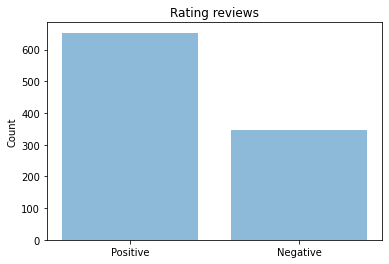

In [14]:
positive_count = (df_review['review_rating'] == 1).sum()
negative_count = (df_review['review_rating'] == 0).sum()

print("Positive reviews:", positive_count)

print("Negative reviews:", negative_count)

objects = ('Positive', 'Negative')
performance = [positive_count, negative_count]
y_pos = np.arange(len(objects))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Rating reviews')

plt.show()

# Text preprocessing
Actually we have only 1 feature: the review text. In order to use words as features we need to preprocess text. We created a python file (`text_processing.py`) dedicated to this aspect. Main steps are:
- Expand: remove english language contrations (es. You're -> You are);
- Tokenize: the text is cleaned of separators and special characters and then broken down into words;
- Remove punctuation
- Stemming: reducing derived words to their base form
- Lemmatize: reduce inflected form of a word to its canonical form

In [15]:
df_review_text_rating = df_review[['text', 'review_rating']].copy()
text_processing.process_text(df_review_text_rating)
df_review_text_rating.head(5)

,text,review_rating,expanded_text,tokenized_text,no_punct_text,stemmed_text,lemmatized_text,processed_text
0,"Do not eat there! Horrible management, staff a...",0,"Do not eat there! Horrible management, staff a...","[Do, not, eat, there, !, Horrible, management,...","[Do, not, eat, there, Horrible, management, st...","[do, not, eat, there, horribl, manag, staff, a...","[do, not, eat, there, horribl, manag, staff, a...",do not eat there horribl manag staff and food ...
1,What a great find! Celebrated out anniversary ...,1,What a great find! Celebrated out anniversary ...,"[What, a, great, find, !, Celebrated, out, ann...","[What, a, great, find, Celebrated, out, annive...","[what, a, great, find, celebr, out, anniversar...","[what, a, great, find, celebr, out, anniversar...",what a great find celebr out anniversari and t...
2,Great happy hour & great food. I had a great t...,1,Great happy hour & great food. I had a great t...,"[Great, happy, hour, &, great, food, ., I, had...","[Great, happy, hour, great, food, I, had, a, g...","[great, happi, hour, great, food, i, had, a, g...","[great, happi, hour, great, food, i, had, a, g...",great happi hour great food i had a great time...
3,"I've been dining here for years, but a recent ...",0,"I have been dining here for years, but a recen...","[I, have, been, dining, here, for, years, ,, b...","[I, have, been, dining, here, for, years, but,...","[i, have, been, dine, here, for, year, but, a,...","[i, have, been, dine, here, for, year, but, a,...",i have been dine here for year but a recent ho...
4,Food was pretty good. Had the southern fried c...,0,Food was pretty good. Had the southern fried c...,"[Food, was, pretty, good, ., Had, the, souther...","[Food, was, pretty, good, Had, the, southern, ...","[food, wa, pretti, good, had, the, southern, f...","[food, wa, pretti, good, had, the, southern, f...",food wa pretti good had the southern fri chick...


# Split dataframe

We will split our dataframe in in training_set (80% of original dataframe) and test_set (20% of original dataframe). In addition, to use each word as feature we use `TfidfVectorizer()` from [sklearn](https://scikit-learn.org/stable/)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
X = df_review_text_rating["processed_text"]
y = df_review_text_rating["review_rating"]

# Training set = 80%
# Test set = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [18]:
# Initialize
vectorizer = TfidfVectorizer()
X_train_vectorizer = vectorizer.fit_transform(X_train)
X_test_vectorizer = vectorizer.transform(X_test)

X_train_df = pd.DataFrame(columns=vectorizer.get_feature_names_out(), data=X_train_vectorizer.toarray())
X_test_df = pd.DataFrame(columns=vectorizer.get_feature_names_out(), data=X_test_vectorizer.toarray())

In [19]:
X_train_df.head(5)

,abe,abid,abil,abita,abl,about,abov,abrupt,abruptli,absolut,...,zero,zest,zip,ziplock,zlt,zoal,zucchini,zumba,zushipok,ànd
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.072876,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
X_test_df.head(5)

,abe,abid,abil,abita,abl,about,abov,abrupt,abruptli,absolut,...,zero,zest,zip,ziplock,zlt,zoal,zucchini,zumba,zushipok,ànd
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.064824,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Algorithms
After dataset processing we'll train the following algorithms and analyze results:
- [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
- [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [Support Vector Machine](https://scikit-learn.org/stable/modules/svm.html)
- [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In order to avoid code duplication, we created 3 functions that will be used for all algorithms.


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#from IPython.core.display_functions import display
import seaborn as sns

In [22]:
# Features as Array
# features = np.array(vectorizer.get_feature_names_out())

# array_X_train = X_train_vectorizer.toarray()
# array_X_test = X_test_vectorizer.toarray()

### Get best parameters
Using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) we can get best parameter for each algorithm by execute an exhaustive search over specified parameter values.

In [23]:
def get_best_parameters(algorithm, algorithm_parameters):
    gs_algorithm = GridSearchCV(algorithm, algorithm_parameters, verbose=3, scoring='f1', n_jobs=-1)

    gs_algorithm.fit(X_train_df, y_train)

    print(gs_algorithm.best_params_)

    # Find best model score
    print(gs_algorithm.score(X_train_df, y_train))

### Execute algorithm
In order to get algorithm score we need to pass our training set to the fit method. After this we'll pass test set to predict in order to get test set score which will be used to compare all algorithms.

In [24]:
def fit_and_predict(algorithm):

    # Training model
    algorithm.fit(X_train_df, y_train)

    # Predicting the test set results
    y_pred_algorithm = algorithm.predict(X_test_df)

    # Training score
    print(f"Score on training set: {algorithm.score(X_train_df, y_train)}")
    print(f"Score on test set: {algorithm.score(X_test_df, y_test)}")

    test_set_score = algorithm.score(X_test_df, y_test) * 100

    return y_pred_algorithm, test_set_score

### Confusion Matrix
The confusion_matrix function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class. Than we visually represent a confusion matrix using plot libraries.

In [25]:
def confusion_matrix_plot(algorithm_name, y_pred_algorithm):
    confusion_matrix_algorithm = confusion_matrix(y_test, y_pred_algorithm)
    df_confusion_matrix = pd.DataFrame(confusion_matrix_algorithm, columns=['Predicted 0', 'Predicted 1'],
                                           index=['True 0', 'True 1'])
    # display(df_confusion_matrix_gnb)

    sns.heatmap(df_confusion_matrix, annot=True, fmt='d')
    plt.title(algorithm_name + " confusion matrix")
    plt.figure(figsize=(24, 14), dpi=100)
    plt.close()

### Performance metrics
For each algorithm we buil a text (and graphical) report showing the main classification metrics (precision, recall and f1-score).

In [26]:
def classification_report_plot(algorithm_name, y_pred_algorithm):
    classification_report_algorithm = classification_report(y_test, y_pred_algorithm, output_dict=True)
    df_algorithm_report = pd.DataFrame(classification_report_algorithm).transpose()

    df_algorithm_report.iloc[:3, :3].plot(kind='bar', title= algorithm_name + 'classification report', rot=0)

    print(df_algorithm_report)

In [27]:
# return score, confusion matrix, classification report
def get_test_set_score(algorithm, algorithm_name, X_train_param, X_test_param):
    y_pred_algorithm, test_set_score_algorithm = fit_and_predict(algorithm)
    confusion_matrix_plot(algorithm_name, y_pred_algorithm)
    classification_report_plot(algorithm_name, y_pred_algorithm)
    return test_set_score_algorithm

## AdaBoostClassifier
AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [28]:
ada_name = 'ADA'

In [29]:
# ada_parameters = {'n_estimators': [10, 50, 100, 250, 500],
#               'learning_rate': [0.01, 0.1],
#               'algorithm': ['SAMME', 'SAMME.R']}
#
# get_best_parameters(AdaBoostClassifier(), ada_parameters)


In [30]:
ada = AdaBoostClassifier(n_estimators=250, learning_rate=0.1, algorithm='SAMME.R')

y_pred_ada, test_set_score_ada = fit_and_predict(ada)

Score on training set: 0.955
Score on test set: 0.85


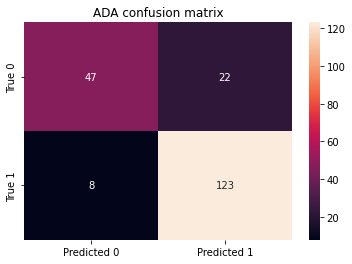

In [31]:
confusion_matrix_plot(ada_name, y_pred_ada)

              precision    recall  f1-score  support
0              0.854545  0.681159  0.758065    69.00
1              0.848276  0.938931  0.891304   131.00
accuracy       0.850000  0.850000  0.850000     0.85
macro avg      0.851411  0.810045  0.824684   200.00
weighted avg   0.850439  0.850000  0.845337   200.00


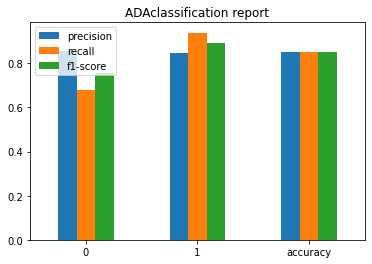

In [32]:
classification_report_plot(ada_name, y_pred_ada)

## GaussianNB
A Gaussian Naive Bayes algorithm is a special type of NB algorithm. It’s specifically used when the features have continuous values.


In [33]:
gnb_name = 'GNB'

In [34]:
# gnb_parameters = {'var_smoothing' : np.logspace(0,-9, num=100)}
#
# get_best_parameters(GaussianNB(), gnb_parameters)

In [35]:
gnb = GaussianNB(var_smoothing=0.0008111308307896872)

y_pred_gnb, test_set_score_gnb = fit_and_predict(gnb)


Score on training set: 0.985
Score on test set: 0.67


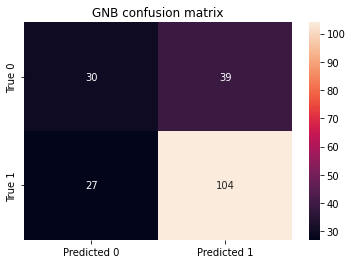

In [36]:
confusion_matrix_plot(gnb_name, y_pred_gnb)

              precision    recall  f1-score  support
0              0.526316  0.434783  0.476190    69.00
1              0.727273  0.793893  0.759124   131.00
accuracy       0.670000  0.670000  0.670000     0.67
macro avg      0.626794  0.614338  0.617657   200.00
weighted avg   0.657943  0.670000  0.661512   200.00


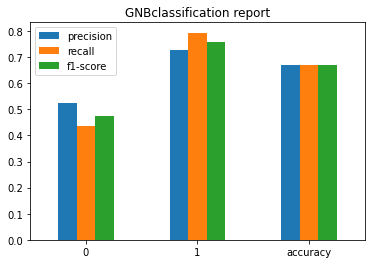

In [37]:
classification_report_plot(gnb_name, y_pred_gnb)

## DecisionTreeClassifier
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

Some advantages of decision trees are:

- Simple to understand and to interpret. Trees can be visualized.
- Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
- Able to handle both numerical and categorical data. However scikit-learn implementation does not support categorical variables for now. - Other techniques are usually specialized in analyzing datasets that have only one type of variable. See algorithms for more information.
- Able to handle multi-output problems.
- Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
- Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
- Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The disadvantages of decision trees include:

- Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
- Predictions of decision trees are neither smooth nor continuous, but piecewise constant approximations as seen in the above figure. Therefore, they are not good at extrapolation.
- The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
- There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
- Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

In [38]:
dtc_name = 'DTC'

In [39]:
# dtc_parameters = {'splitter': ['best', 'random'],
#                   'max_features': ['auto', 'sqrt', 'log2', None],
#                   'random_state': [7, 42, 101]}
#
# get_best_parameters(DecisionTreeClassifier(), dtc_parameters)

In [40]:
dtc = DecisionTreeClassifier(splitter='random', max_features=None, random_state=7)

y_pred_dtc, test_set_score_dtc = fit_and_predict(dtc)


Score on training set: 1.0
Score on test set: 0.81


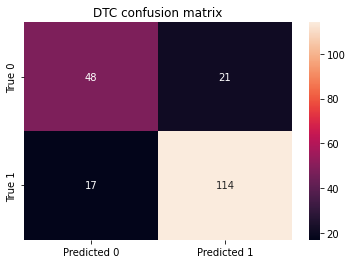

In [41]:
confusion_matrix_plot(dtc_name, y_pred_dtc)

              precision    recall  f1-score  support
0              0.738462  0.695652  0.716418    69.00
1              0.844444  0.870229  0.857143   131.00
accuracy       0.810000  0.810000  0.810000     0.81
macro avg      0.791453  0.782941  0.786780   200.00
weighted avg   0.807880  0.810000  0.808593   200.00


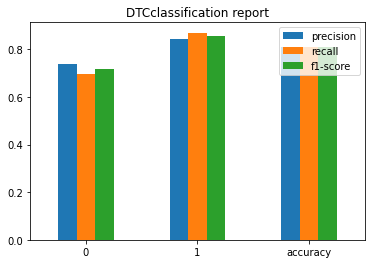

In [42]:
classification_report_plot(dtc_name, y_pred_dtc)

## LogisticRegression
Logistic Regression is a supervised learning technique which is used to evaluate the relationship between dependent and independent variables by probabilities using a logistic function. These probabilities will be transformed into binary values between 0 and 1 to proceed then with the prediction.

This algorithm is used the most in binary classification problems such as predicting whether an email is a spam or not, whether a tumor is malignant or, like in our situation, tell if a review is positive or negative.

In [43]:
lr_name = 'LR'

In [44]:
# lr_parameters = {'C': [0.001, 0.01, 0.1, 1.0],
#               'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga'],
#               'random_state': [7, 42, 101]}
#
# get_best_parameters(LogisticRegression(), lr_parameters)

In [45]:
lr = LogisticRegression(C=1.0, solver='newton-cg', random_state=7)

y_pred_lr, test_set_score_lr = fit_and_predict(lr)

Score on training set: 0.91125
Score on test set: 0.81


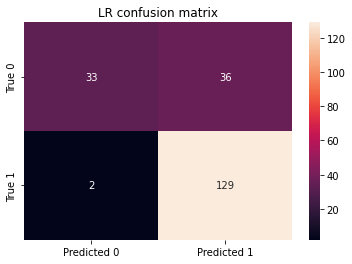

In [46]:
confusion_matrix_plot(lr_name, y_pred_lr)

              precision    recall  f1-score  support
0              0.942857  0.478261  0.634615    69.00
1              0.781818  0.984733  0.871622   131.00
accuracy       0.810000  0.810000  0.810000     0.81
macro avg      0.862338  0.731497  0.753119   200.00
weighted avg   0.837377  0.810000  0.789854   200.00


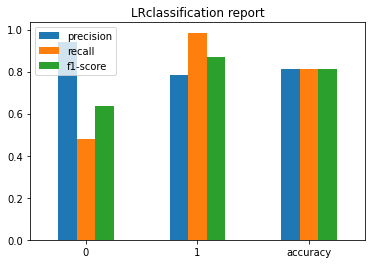

In [47]:
classification_report_plot(lr_name, y_pred_lr)

## KNeighborsClassifier
Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

In [48]:
knc_name = 'KNC'

In [49]:
# knc_parameters = {'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
#               'algorithm': ['ball_tree']}
#
# get_best_parameters(KNeighborsClassifier(n_jobs=-1), knc_parameters)

In [50]:
knc = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=31, weights='uniform', n_jobs=-1)

y_pred_knc, test_set_score_knc = fit_and_predict(knc)

Score on training set: 0.80375
Score on test set: 0.75


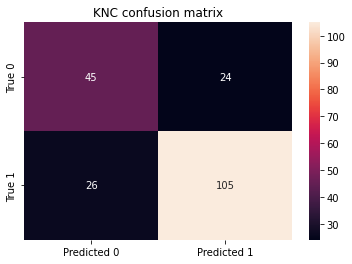

In [51]:
confusion_matrix_plot(knc_name, y_pred_knc)

              precision    recall  f1-score  support
0              0.633803  0.652174  0.642857    69.00
1              0.813953  0.801527  0.807692   131.00
accuracy       0.750000  0.750000  0.750000     0.75
macro avg      0.723878  0.726850  0.725275   200.00
weighted avg   0.751802  0.750000  0.750824   200.00


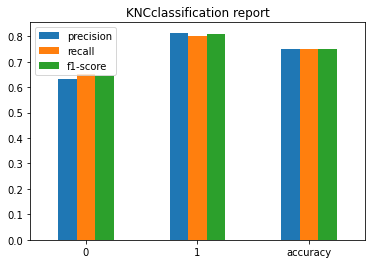

In [52]:
classification_report_plot(knc_name, y_pred_knc)

## Support Vector Machine
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:
- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).


In [53]:
svc_name = 'SVC'

In [54]:
# svc_parameters = {'C': [0.001, 0.01, 0.1, 1.0],
#               'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
#               'decision_function_shape': ['ovo', 'ovr']}
#
# get_best_parameters(SVC(), svc_parameters)

In [55]:
svc = SVC(C=1.0, kernel='linear', decision_function_shape='ovo')

y_pred_svc, test_set_score_svc = fit_and_predict(svc)

Score on training set: 0.985
Score on test set: 0.87


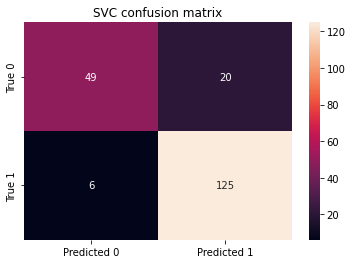

In [56]:
confusion_matrix_plot(svc_name, y_pred_svc)

              precision    recall  f1-score  support
0              0.890909  0.710145  0.790323    69.00
1              0.862069  0.954198  0.905797   131.00
accuracy       0.870000  0.870000  0.870000     0.87
macro avg      0.876489  0.832172  0.848060   200.00
weighted avg   0.872019  0.870000  0.865958   200.00


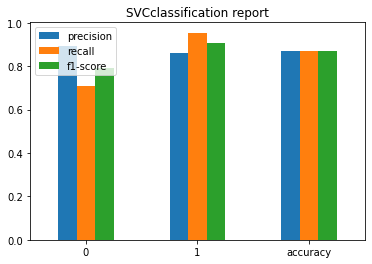

In [57]:
classification_report_plot(svc_name, y_pred_svc)

## RandomForestClassifier
This algorithm is a supervised learning technique where the "forest" terms points to a set of decision trees, obtained by aggregation using "bagging" algorithm, that should be trained. In fact, Random Forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

In [58]:
rfc_name = 'RFC'

In [59]:
# rfc_parameters = {'n_estimators': [10, 50, 100, 250, 500],
#               'random_state': [7, 42, 101]}
#
# get_best_parameters(RandomForestClassifier(), rfc_parameters)

In [60]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

y_pred_rfc, test_set_score_rfc = fit_and_predict(rfc)

Score on training set: 1.0
Score on test set: 0.795


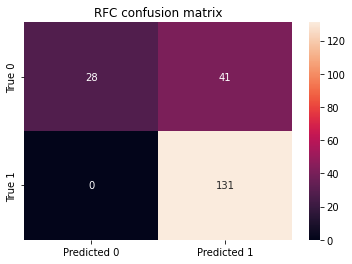

In [61]:
confusion_matrix_plot(rfc_name, y_pred_rfc)

              precision    recall  f1-score  support
0              1.000000  0.405797  0.577320   69.000
1              0.761628  1.000000  0.864686  131.000
accuracy       0.795000  0.795000  0.795000    0.795
macro avg      0.880814  0.702899  0.721003  200.000
weighted avg   0.843866  0.795000  0.765545  200.000


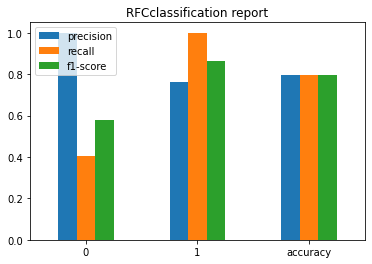

In [62]:
classification_report_plot(rfc_name, y_pred_rfc)

## Plot algorithm accuracy
After running all the algorithms, we plot all the accuracies to decide the best algorithm to perform the task. In this case the best one is SVC.

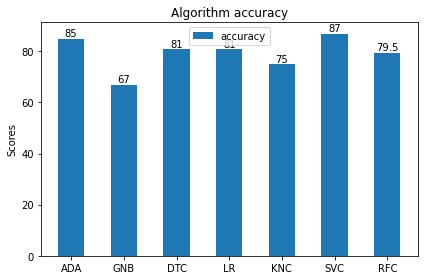

In [63]:
labels = [ada_name, gnb_name, dtc_name, lr_name, knc_name, svc_name, rfc_name]
score_values = [test_set_score_ada, test_set_score_gnb, test_set_score_dtc, test_set_score_lr, test_set_score_knc, test_set_score_svc, test_set_score_rfc]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the space between bar
width_bar = 0.50

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, score_values, width_bar, label='accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Algorithm accuracy')
ax.set_xticks(x - width/2, labels)
ax.legend()

ax.bar_label(rects1)

fig.tight_layout()

plt.show()

# Export SVC Model
We exported SVC model using Pickle in order to use it as prediction algorithm.

[Pickle](https://docs.python.org/3/library/pickle.html) library is used for serializing a Python object structure.

In [ ]:
import pickle

In [ ]:
# pickle.dump(svc, open('svc_model.pkl', 'wb'))
# pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

# Predict Review Test
Test exported module. The code is in `predictions.py` becouse we'll use it later.

In [67]:
from utils import predictions

predictions.predict_review("This restaurant is very very bad!")

array([0], dtype=int32)